In [1]:
import acalib

In [2]:
cube = acalib.load('OMC-3_HC3N.pbcor.fits')

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Removing superfluous dimension STOKES (kept in the metadata) [acalib.io.fits]


In [3]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.859125029200001  -5.1762312283460004  90985637448.699997  
CRPIX : 257.0  257.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.00078333333333329997  0.00078333333333329997  -70709.289367680001  
NAXIS    : 512 512

In [4]:
cube.select_region(interactive=True)

In [5]:
usable=cube.cut([[0, 120, 211], [299, 350, 334]])

In [6]:
usable.visualize()

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/ipyvolume/serialize.py:29: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [7]:
usable.select_band(interactive=True)

In [8]:
usable=usable.cut([[125, 0, 0], [161, 229, 123]])

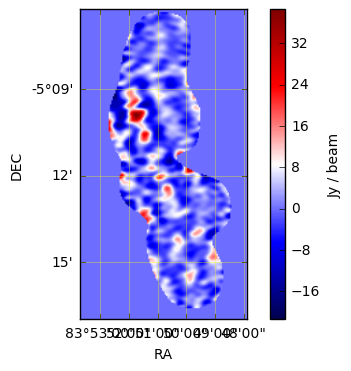

In [9]:
usable.visualize_image(cmap="seismic")

In [16]:
s_usable, a, b = acalib.standarize(usable)
result=acalib.core.snr_estimation(s_usable.data,mask=s_usable.mask,points=1000,full_output=True,max_rms=2.0)

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/home/mauricio/scm/acalib/acalib/core/statistics.py:58: RuntimeWarning: invalid value encountered in greater
  sdata = data[data > noise]


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


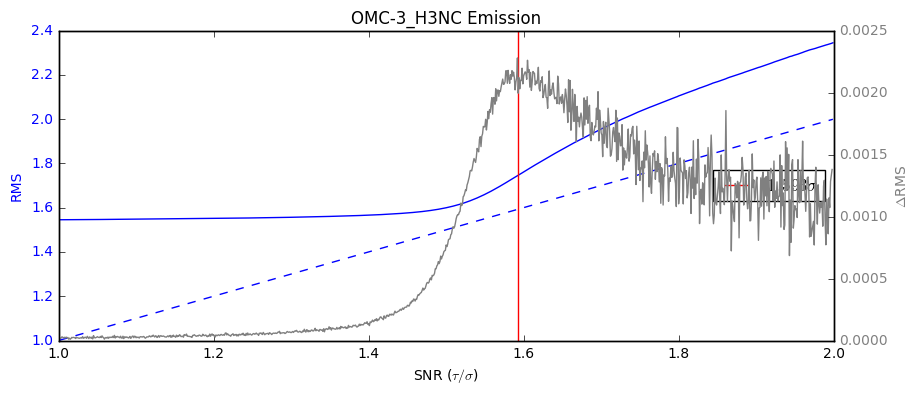

In [17]:
# Display it
import matplotlib.pyplot as plt
acalib.plot_snr_estimation("OMC-3_H3NC Emission",result)
plt.show()

In [18]:
# unpack
(snrlimit, noise, _, _, _, _, _) = result
print(snrlimit)
print(noise)

1.593
1.53892316774e-06


In [20]:
halgo = acalib.HRep()
halgo.config['NOISE'] = noise
halgo.config['SNR'] = snrlimit
halgo.config['KERNEL'] = 'METABUBBLE'
halgo.config['VERBOSE'] = True
%time (rep,syn,res) = halgo.run(usable)


/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]
INFO: Iteration: 1000 [acalib.core.compact_rep]
INFO: Maximum energy E = 3.08363e-06 SNR = 2.00375571843 [acalib.core.compact_rep]
INFO: Iteration: 2000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.7526e-06 SNR = 1.78865613129 [acalib.core.compact_rep]
INFO: Iteration: 3000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.61965e-06 SNR = 1.70226045881 [acalib.core.compact_rep]
INFO: Iteration: 4000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.55252e-06 SNR = 1.65863902747 [acalib.core.compact_rep]
INFO: Iteration: 5000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.51166e-06 SNR = 1.63209068048 [acalib.core.compact_rep]
INFO: Iteration: 6000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.48241e-06 SNR = 1.61308356752 [acalib.core.compact_rep]
INFO: Iteration: 7000 [acalib.core.compact_rep]
INFO: Maximum energy E = 2.46056e-06 SNR = 1.5988861133 [acalib.core.compa

In [21]:
rep.meta

{'DELTAX': 1,
 'DELTAY': 2.0,
 'DELTAZ': 2.0,
 'GAMMA': 0.1,
 'KERNEL': 'METABUBBLE',
 'NOISE': 1.5389231677353248e-06,
 'SCALE': 1791472.1,
 'SHIFT': -4.2242932,
 'SNR': 1.593}

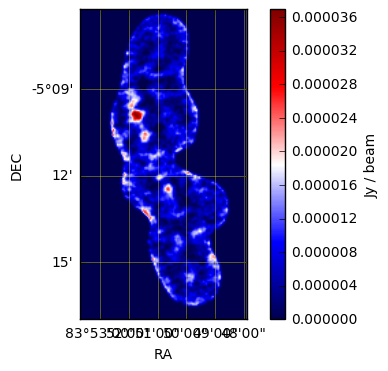

In [22]:
syn.visualize_image(cmap="seismic")

In [ ]:
syn.visualize()

In [ ]:
res.visualize_image(cmap="seismic")

In [23]:
#from astropy.io import ascii
#tab=rep['center'].data
#ascii.write(tab,"REP-OrionBar-CO.dat")
rep.write('REP-OMC3-HC3N.fits',overwrite=True)
hdu=acalib.Data_to_HDU(syn,primary=True)
hdu.writeto("SYN-OMC3-HC3N.fits",clobber=True)
hdu=acalib.Data_to_HDU(res,primary=True)
hdu.writeto("RES-OMC3-HC3N.fits",clobber=True)

In [ ]:
import numpy as np
import scipy
A=np.array(usable.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 

In [ ]:
C=B/25.0
C[C>1.0]=1.0
dat = usable.data*C

In [ ]:
acalib.visualize_image(acalib.moment0(dat,wcs=usable.wcs,mask=usable.mask))

In [ ]:
acalib.visualize_volume(dat,wcs=usable.wcs,unit=usable.unit)

In [ ]:
cubep=cube.cut([[0, 256, 242], [599, 285, 268]])


In [ ]:
scube,yf,ls= acalib.standarize(cube)

In [ ]:
A=np.array(scube.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 
C=B/20.0
C[C>1.0]=1.0
dat = scube.data*C

In [ ]:
acalib.visualize_image(acalib.moment0(dat,wcs=scube.wcs,mask=scube.mask),cmap="seismic")

In [ ]:
scube.visualize_image(cmap="seismic")

In [ ]:
cubep.visualize()